<a href="https://colab.research.google.com/github/Ali-Shabanpour/Google-Colab/blob/main/ML_MP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">
  <img src="https://drive.google.com/uc?export=view&id=141BJVwtPjNAL1F8yasImXWT9JA3ZjszY" width="500"><br><br>
  <img src="https://drive.google.com/uc?export=view&id=1Kxqq1-kCQb2xC0WDAchliOa4oVO24bc_" width="400">

<br>
<font color="5acfee" size="6">پاسخ مینی پروژه دوم یادگیری ماشین</font><br>
<font color="5acfee" size="5">نگارش: علی شعبانپور مقدم - هدیه شوشیان</font><br>
<font color="5acfee" size="5">شماره دانشجویی: 40207304-40308054</font><br>
<font color="5acfee" size="5">استاد درس: دکتر مهدی علیاری شوره دلی</font><br>
<font color="5acfee" size="5">بهار 1404</font>

</div>


#1st Question

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1WRIZ7VupFp_pl8FP6ps8oQKKIrhUydfq

Downloading...
From: https://drive.google.com/uc?id=1WRIZ7VupFp_pl8FP6ps8oQKKIrhUydfq
To: /content/spam.csv
100% 504k/504k [00:00<00:00, 16.3MB/s]


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
_ = __import__('pandas')
read_fn = getattr(_, 'read_csv')
df = read_fn('/content/spam.csv', encoding='latin1')

In [ ]:
spam_data = df[df['v1'] == 'spam']['v2']
ham_data = df[df['v1'] == 'ham']['v2']
msg_all = df['v2']
lbl_all = df['v1']

In [ ]:
import string as s  # load symbol list module

# strip special marks
rm_punc = lambda txt: txt.translate(str.maketrans('', '', s.punctuation))
spam_data = spam_data.apply(rm_punc)
ham_data = ham_data.apply(rm_punc)

# normalize text
spam_data = spam_data.str.lower()
ham_data = ham_data.str.lower()

spam_data


,v2
2,free entry in 2 a wkly comp to win fa cup fina...
5,freemsg hey there darling its been 3 weeks now...
8,winner as a valued network customer you have b...
9,had your mobile 11 months or more u r entitled...
11,six chances to win cash from 100 to 20000 poun...
...,...
5537,want explicit sex in 30 secs ring 02073162414 ...
5540,asked 3mobile if 0870 chatlines inclu in free ...
5547,had your contract mobile 11 mnths latest motor...
5566,reminder from o2 to get 250 pounds free call c...


In [ ]:
import re  # tool for pattern cleanup

# filter out digits
def strip_digits(t):
    return re.sub(r'\d+', '', t)

spam_data = spam_data.apply(strip_digits)
ham_data = ham_data.apply(strip_digits)

spam_data


,v2
2,free entry in a wkly comp to win fa cup final...
5,freemsg hey there darling its been weeks now ...
8,winner as a valued network customer you have b...
9,had your mobile months or more u r entitled t...
11,six chances to win cash from to pounds txt c...
...,...
5537,want explicit sex in secs ring now costs pmi...
5540,asked mobile if chatlines inclu in free mins ...
5547,had your contract mobile mnths latest motorol...
5566,reminder from o to get pounds free call credi...


In [ ]:
import nltk  # text toolkit

nltk.download('stopwords')  # grab common fillers

from nltk.corpus import stopwords as sw
skip_words = set(sw.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# trim out fillers
def skip_common_terms(t):
    tokens = t.split()
    refined = [w for w in tokens if w.lower() not in skip_words]
    return ' '.join(refined)

spam_data = spam_data.apply(skip_common_terms)
ham_data = ham_data.apply(skip_common_terms)


In [ ]:
from collections import Counter  # counter tool for frequency

# combine words into one long list
all_spam_words = ' '.join(spam_data)
all_ham_words = ' '.join(ham_data)
spam_words = all_spam_words.split()
ham_words = all_ham_words.split()

# count occurrences of each term
spam_word_counts = Counter(spam_words)
ham_word_counts = Counter(ham_words)


In [ ]:
# extract top terms from spam and ham word counts
top_spam_terms = [w for w, c in spam_word_counts.most_common(15)]
top_ham_terms = [w for w, c in ham_word_counts.most_common(15)]

# filter out specific common words
exclude_list = ['u', 'ur']
top_spam_terms = [w for w in top_spam_terms if w not in exclude_list]
top_ham_terms = [w for w in top_ham_terms if w not in exclude_list]

# combine vocab from both spam and ham terms
vocabulary = list(set(top_spam_terms + top_ham_terms))
top_spam_terms


['call',
 'å£',
 'free',
 'txt',
 'mobile',
 'text',
 'stop',
 'claim',
 'reply',
 'prize',
 'get',
 'p',
 'nokia']

In [ ]:
import re  # pattern manipulation
from nltk.tokenize import word_tokenize  # token splitter
from nltk.corpus import stopwords as sw  # filter tool
import nltk  # nltk library

nltk.download('punkt')  # download tokenizing model
nltk.download('stopwords')  # get stopword list
nltk.download('punkt_tab')  # auxiliary model

skip_words = set(sw.words('english'))  # filler words

X_vector = []  # vector storage

for msg in msg_all:  # loop through all messages

    msg = msg.lower()  # make lowercase
    msg = re.sub(r'\d+', '', msg)  # remove numbers
    msg = re.sub(r'[^\w\s]', '', msg)  # remove punctuation
    tokens = word_tokenize(msg)  # break into words
    tokens = [w for w in tokens if w not in skip_words]  # filter out fillers

    vector = [1 if w in tokens else 0 for w in vocabulary]  # binary vector for words
    X_vector.append(vector)  # add to list


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
X_df = pd.DataFrame(X_vector, columns=vocabulary)  # convert to DataFrame
X_df['label'] = lbl_all.values  # add labels
X_df  # display the DataFrame


,txt,come,ill,know,im,ltgt,p,got,text,get,...,prize,nokia,like,ok,dont,å£,reply,go,stop,label
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,ham
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,ham
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,spam
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,ham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,spam
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,ham


In [ ]:
from sklearn.model_selection import train_test_split  # splitting tool

X_train, X_test, y_train, y_test = train_test_split(
    X_df.iloc[:, :-1],  # features
    X_df['label'],  # target labels
    random_state=24,  # seed for reproducibility
    stratify=df['v1']  # maintain class distribution
)

In [ ]:
import numpy as np  # array tool

# calculate class probabilities
classes = np.unique(y_train)  # unique classes in target
class_probs = {}  # dictionary for storing probabilities
for c in classes:
    class_probs[c] = (y_train == c).sum() / len(y_train)  # probability for each class

class_probs  # display class probabilities


{'ham': np.float64(0.8659966499162479),
 'spam': np.float64(0.13400335008375208)}

In [ ]:
# calculate word probabilities for each class
word_probs = {}  # dictionary for storing word probabilities
for c in classes:
    X_c = X_train[y_train == c]  # filter rows for class c

    # apply Laplace smoothing to calculate probabilities
    probs = (X_c.sum(axis=0) + 1) / (X_c.shape[0] + 2)
    word_probs[c] = probs  # store probabilities for class c

word_probs  # display word probabilities


{'ham': txt       0.003038
 come      0.043082
 ill       0.051091
 know      0.046672
 im        0.086993
 ltgt      0.044187
 p         0.001381
 got       0.049158
 text      0.014637
 get       0.056062
 mobile    0.003590
 call      0.039492
 good      0.045291
 claim     0.000276
 free      0.013532
 prize     0.000276
 nokia     0.000552
 like      0.043634
 ok        0.057167
 dont      0.049158
 å£        0.000276
 reply     0.008561
 go        0.047225
 stop      0.006352
 dtype: float64,
 'spam': txt       0.192171
 come      0.003559
 ill       0.003559
 know      0.028470
 im        0.016014
 ltgt      0.001779
 p         0.092527
 got       0.010676
 text      0.145907
 get       0.113879
 mobile    0.160142
 call      0.446619
 good      0.014235
 claim     0.154804
 free      0.225979
 prize     0.119217
 nokia     0.074733
 like      0.019573
 ok        0.008897
 dont      0.024911
 å£        0.001779
 reply     0.115658
 go        0.042705
 stop      0.131673
 dtype: 

In [ ]:
# function to make predictions on test data
def predict(X_test):
    predictions = []  # store predictions

    for i in range(X_test.shape[0]):  # loop through test samples
        scores = {}  # store score for each class

        for c in classes:  # for each class
            score = np.log(class_probs[c])  # start with class probability

            for word in X_train.columns:  # check each word in the vocab
                if X_test.iloc[i][word] == 1:  # word present
                    score += np.log(word_probs[c][word])
                else:  # word absent
                    score += np.log(1 - word_probs[c][word])

            scores[c] = score  # store score for class c

        predicted_class = max(scores, key=scores.get)  # pick class with highest score
        predictions.append(predicted_class)  # add to predictions list

    return predictions  # return all predictions


In [ ]:
# make predictions on the test set
y_pred = predict(X_test)

# calculate accuracy by comparing predictions with actual labels
correct = (y_pred == y_test).sum()  # count correct predictions
accuracy = correct / len(y_test)  # compute accuracy

accuracy  # display accuracy


np.float64(0.9346733668341709)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision11 = precision_score(y_test,y_pred,pos_label = 'spam')
recall11 = recall_score(y_test,y_pred,pos_label = 'spam')
precision22 = precision_score(y_test,y_pred,pos_label = 'ham')
recall22 = recall_score(y_test,y_pred,pos_label = 'ham')

print(recall11,precision11)
print(recall22,precision22)

0.6096256684491979 0.8636363636363636
0.9850746268656716 0.9421094369547978


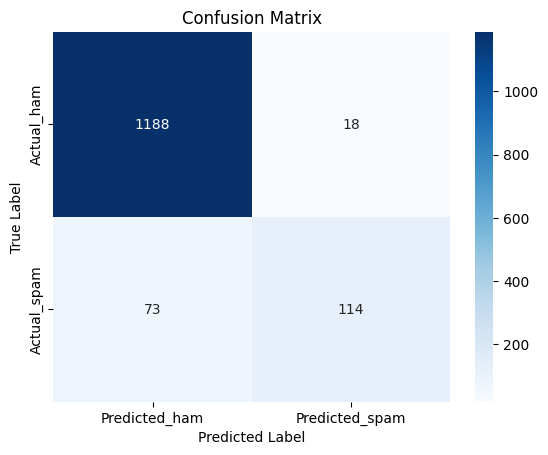

In [ ]:
import seaborn as sns  # visualization tool
import matplotlib.pyplot as plt  # plotting library
from sklearn.metrics import confusion_matrix  # for confusion matrix computation

# generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['ham', 'spam'])

# create heatmap of confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted_ham', 'Predicted_spam'],
            yticklabels=['Actual_ham', 'Actual_spam'])

# add plot labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()  # render the plot


In [ ]:
from sklearn.naive_bayes import BernoulliNB  # load Bernoulli Naive Bayes model

# initialize the classifier
clf = BernoulliNB()

# train the model on the training data
clf.fit(X_train, y_train)

# predict labels for the test set
y_pred1 = clf.predict(X_test)


In [ ]:
# compare model predictions with actual labels
correct = (y_pred1 == y_test).sum()  # count matches
accuracy = correct / len(y_test)  # compute proportion

accuracy  # show result


np.float64(0.9346733668341709)

In [ ]:
from sklearn.metrics import precision_score  # for precision calculation
from sklearn.metrics import recall_score  # for recall calculation

# evaluate for 'spam' class
prec_spam = precision_score(y_test, y_pred1, pos_label='spam')
rec_spam = recall_score(y_test, y_pred1, pos_label='spam')

# evaluate for 'ham' class
prec_ham = precision_score(y_test, y_pred1, pos_label='ham')
rec_ham = recall_score(y_test, y_pred1, pos_label='ham')

# display results
print(rec_spam, prec_spam)
print(rec_ham, prec_ham)


0.6096256684491979 0.8636363636363636
0.9850746268656716 0.9421094369547978


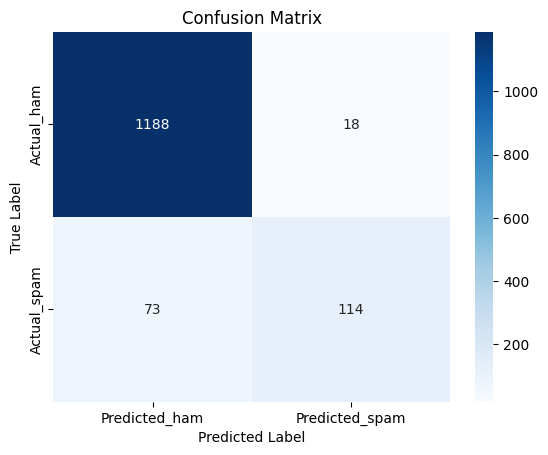

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1, labels=['ham', 'spam'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted_ham', 'Predicted_spam'],
            yticklabels=['Actual_ham', 'Actual_spam'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# alternative prediction function with thresholding
def predict1(X_test):
    predictions = []  # list to store outputs

    for i in range(X_test.shape[0]):  # iterate through test samples
        scores = {}  # log-scores for each class

        for c in classes:
            score = np.log(class_probs[c])  # start from log prior
            for word in X_train.columns:  # go through features
                if X_test.iloc[i][word] == 1:
                    score += np.log(word_probs[c][word])
                else:
                    score += np.log(1 - word_probs[c][word])
            scores[c] = score  # store total score for class

        # softmax adjustment for numerical stability
        max_log = max(scores.values())
        exp_scores = {c: np.exp(scores[c] - max_log) for c in classes}
        total = sum(exp_scores.values())
        probs = {c: exp_scores[c] / total for c in classes}

        # use adjusted threshold for decision
        if probs['spam'] > (1 / 6):  # 0.1667 threshold
            predictions.append('spam')
        else:
            predictions.append('ham')

    return predictions  # return predicted classes


In [ ]:
# get predictions using custom thresholding
y_prediction = predict1(X_test)

from sklearn.metrics import precision_score  # precision tool
from sklearn.metrics import recall_score  # recall tool

# evaluate performance for 'spam' class
Pre = precision_score(y_test, y_prediction, pos_label='spam')
Rec = recall_score(y_test, y_prediction, pos_label='spam')

Rec, Pre  # show recall and precision


(0.8021390374331551, 0.6607929515418502)

#2nd Question

## Part (a) - Normalizing MNIST Data



We loaded the MNIST dataset using `fetch_openml` from `sklearn.datasets` and selected the first 10,000 samples.

Each MNIST image is originally a 28x28 grayscale image, which is already flattened into a 784-dimensional vector in this dataset.


For normalizing the MNIST dataset before applying KNN, we used `MinMaxScaler`.

### ❓ Why MinMaxScaler?

- **Data range**: MNIST pixel values range from 0 to 255. `MinMaxScaler` scales features to a fixed range — typically [0, 1]. This preserves the relative distances between pixel intensities.
- **KNN sensitivity**: KNN relies on **Euclidean distance**, which is sensitive to feature magnitudes.
- **Suitability for image data**: Since pixel values are naturally bounded and non-negative, `MinMaxScaler` is more appropriate than `StandardScaler`, which centers data around zero and assumes a Gaussian-like distribution.

`MinMaxScaler` is often a better choice when:
- The original data has a well-defined minimum and maximum (like images).
- We don’t want to shift the data mean but rather scale the values uniformly.

Thus, we chose `MinMaxScaler` based on the **nature of the data** and the **distance-based sensitivity of the KNN algorithm**.


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Load MNIST dataset using sklearn
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Select the first 10,000 samples and convert types
X = mnist.data[:10000].astype('float32')  # Convert pixel values to float32
y = mnist.target[:10000].astype('int')    # Convert labels to integers

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# If you prefer to use StandardScaler instead, comment out the above 2 lines and uncomment below ones
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

## Part (b) - Train/Test Split

The normalized data has been split into two sets:

- 70% for training
- 30% for testing

We used `train_test_split` from `sklearn.model_selection` with a fixed random seed for reproducibility.


In [ ]:
# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Check shapes and data types to confirm
print("X_train shape:", X_train.shape)
print("Y_train shape:", y_train.shape)

X_train shape: (7000, 784)
Y_train shape: (7000,)


## Data Samples

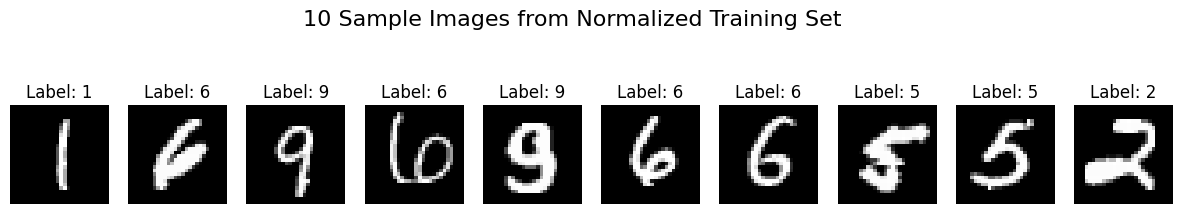

In [ ]:
# Select 10 random indices from the training set
np.random.seed(40)
indices = np.random.choice(len(X_train), 10, replace=False)

# Plot the selected images
plt.figure(figsize=(15, 3))
for i, idx in enumerate(indices):
    image = X[idx].reshape(28, 28)  # Reshape the 784-length vector back to 28x28
    plt.subplot(1, 10, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {y[idx]}")
    plt.axis('off')
plt.suptitle("10 Sample Images from Normalized Training Set", fontsize=16)
plt.show()


## Part (c) - K-Nearest Neighbors (KNN)

We trained KNN classifiers using `k = 3, 5, 9` and measured their accuracy on the test set.

Then, we performed a sweep over `k` values from 1 to 25 in steps of 2 to find the optimal number of neighbors.

The model's accuracy was evaluated using `accuracy_score` from `sklearn.metrics`, and the best performing `k` was reported.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Try at least three values of k
k_values = [3, 5, 9]

print("Evaluating k = 3, 5, 9")
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"k = {k} -> Accuracy: {acc:.4f}")


Evaluating k = 3, 5, 9
k = 3 -> Accuracy: 0.9467
k = 5 -> Accuracy: 0.9420
k = 9 -> Accuracy: 0.9360


In [ ]:
k_range = range(1, 26, 2)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Find the best k
best_k = k_range[np.argmax(accuracies)]
best_accuracy = max(accuracies)

print(f"\nBest k: {best_k} with accuracy: {best_accuracy:.4f}")



Best k: 3 with accuracy: 0.9467


## Part (d) - K-Nearest Accuracy Plot
A plot of accuracy versus `k` generated to visualize the trend.

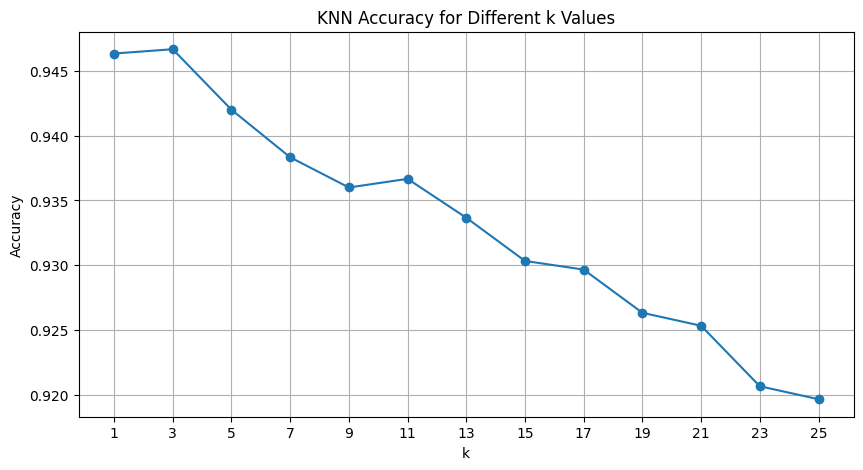

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(k_range, accuracies, marker='o')
plt.title("KNN Accuracy for Different k Values")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.xticks(k_range)
plt.grid(True)
plt.show()


## Part (e) - Improving KNN with PCA

We applied PCA to reduce the dimensionality of the MNIST dataset before training the KNN classifier.

### Why PCA Helps:
- The original MNIST data has 784 features, which are highly correlated or contain little useful information.
- PCA compresses the data by finding directions (components) that explain the most variance.
- This reduces noise and computational cost, and sometimes improves model performance.

We trained KNN with best K which is `k=3` on PCA-reduced data using different numbers of components: 20, 40, 60, 80, and 100 to see if results can improve.

The resulting accuracies were plotted against the number of components to visualize the effect of using PCA.


In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the range of PCA components to evaluate
components_range = [10,20,30,40,50, 60,70, 80,90, 100]
accuracies_pca = []

# Loop over different numbers of components
for n_components in components_range:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_pca, y_train)
    y_pred_pca = knn.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred_pca)
    accuracies_pca.append(acc)
    print(f"PCA Components = {n_components} -> Accuracy: {acc:.4f}")


PCA Components = 10 -> Accuracy: 0.9093
PCA Components = 20 -> Accuracy: 0.9470
PCA Components = 30 -> Accuracy: 0.9550
PCA Components = 40 -> Accuracy: 0.9573
PCA Components = 50 -> Accuracy: 0.9550
PCA Components = 60 -> Accuracy: 0.9550
PCA Components = 70 -> Accuracy: 0.9553
PCA Components = 80 -> Accuracy: 0.9530
PCA Components = 90 -> Accuracy: 0.9513
PCA Components = 100 -> Accuracy: 0.9503


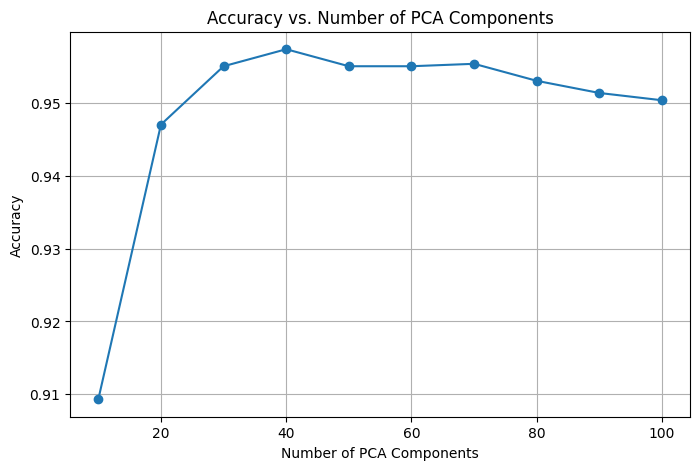

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(components_range, accuracies_pca, marker='o')
plt.title("Accuracy vs. Number of PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


### Comparison with Full Feature Space:
The best KNN accuracy **without PCA** was **0.9467** using `k=3`. PCA can improve efficiency and prevent overfitting, We achieved accuracy of 0.9563 with k=3 that shows new best performance for our model and the positive effect of using PCA.

#3rd Question

##3.1 Dataset


In [ ]:
# Import pandas
import pandas as pd

# Raw GitHub CSV URL
csv_url = "https://raw.githubusercontent.com/sobhanskh/Ai_2025/main/Company_Data.csv"

# Load the CSV into a pandas DataFrame
df = pd.read_csv(csv_url)

# Display the first 10 rows
df.head(10)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


**Load and Preview Company Data**

We loaded `Company_Data.csv` from the GitHub repository using its raw link.

The dataset contains 240 records with 10 features, representing different  features influencing sales.

Using `.head(10)`, we displayed the first 10 rows to inspect the dataset structure before applying analysis.


## 3.2  Data Preprocessing

We performed the following preprocessing tasks on `Company_Data.csv`:

1. **Missing Data:** Checked for missing values and removed rows containing any.
2. **Duplicate Data:** Checked for and removed duplicate rows to avoid data leakage and bias.
3. **Categorical Encoding:** Encoded the `ShelveLoc` feature using one-hot encoding to convert it into numeric format suitable for model training.
4. **Binary Classification Target:** Transformed the `Sales` column into a binary `HighSales` target, where values ≥ 9 are labeled as 1 (high), and others as 0 (low).

Now the dataset is clean and ready for training classification models like decision trees.


In [ ]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Remove rows with any missing values
df_clean = df.dropna()

print(f"\nOriginal shape: {df.shape}")
print(f"Shape after removing missing data: {df_clean.shape}")

In [ ]:
# Check for duplicate rows
duplicates = df_clean.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Remove duplicates if any
df_clean = df_clean.drop_duplicates()
print(f"Shape after removing duplicates: {df_clean.shape}")


Number of duplicate rows: 0
Shape after removing duplicates: (400, 11)


In [ ]:

# Create a copy to preserve original df_encoded
df_encoded = df_clean.copy()

# Encode Urban: Yes → 1, No → 0
df_encoded['Urban'] = df_encoded['Urban'].map({'Yes': 1, 'No': 0})

# Encode US: Yes → 1, No → 0
df_encoded['US'] = df_encoded['US'].map({'Yes': 1, 'No': 0})

# Encode ShelveLoc: Bad → 0, Medium → 1, Good → 2
shelve_mapping = {'Bad': 0, 'Medium': 1, 'Good': 2}
df_encoded['ShelveLoc'] = df_encoded['ShelveLoc'].map(shelve_mapping)

**Integer Encoding for Categorical Features**

We converted categorical columns into numerical labels for compatibility with ML models:

- `Urban`:  
  - Yes → 1  
  - No → 0  

- `US` (Sold in the US):  
  - Yes → 1  
  - No → 0  

- `ShelveLoc` (Shelf location in store):  
  - Bad → 0  
  - Medium → 1  
  - Good → 2  

This type of encoding preserves category information in a compact numerical format without increasing dimensionality.


In [ ]:
# Check target column distribution
print("\nSales column description:")
print(df_encoded['Sales'].describe())


Sales column description:
count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64


In [ ]:
# Custom business-aware thresholds
def categorize_sales_custom(s):
    if s <= 6:
        return 'low'
    elif s <= 10:
        return 'medium'
    else:
        return 'high'

# Apply to original DataFrame
df_encoded['SalesCategory'] = df_encoded['Sales'].apply(categorize_sales_custom)

# Save final DataFrame with new labels
df_final = df_encoded.drop(columns=['Sales'])

# Show distribution
print("SalesCategory distribution (custom thresholds):")
print(df_final['SalesCategory'].value_counts())
df_final.head(15)

SalesCategory distribution (custom thresholds):
SalesCategory
medium    192
low       130
high       78
Name: count, dtype: int64


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SalesCategory
0,138,73,11,276,120,0,42,17,1,1,medium
1,111,48,16,260,83,2,65,10,1,1,high
2,113,35,10,269,80,1,59,12,1,1,high
3,117,100,4,466,97,1,55,14,1,1,medium
4,141,64,3,340,128,0,38,13,1,0,low
5,124,113,13,501,72,0,78,16,0,1,high
6,115,105,0,45,108,1,71,15,1,0,medium
7,136,81,15,425,120,2,67,10,1,1,high
8,132,110,0,108,124,1,76,10,0,0,medium
9,132,113,0,131,124,1,76,17,0,1,low


**Categorizing Sales into Three Classes**

We used **custom thresholds** that better reflect realistic sales behavior:

- `low`: Sales ≤ 6
- `medium`: Sales > 6 and ≤ 10
- `high`: Sales > 10

This way, we ensure only a **small percentage of products** fall into the `high` category, which is more consistent with real-world sales distributions where top-selling items are rare.


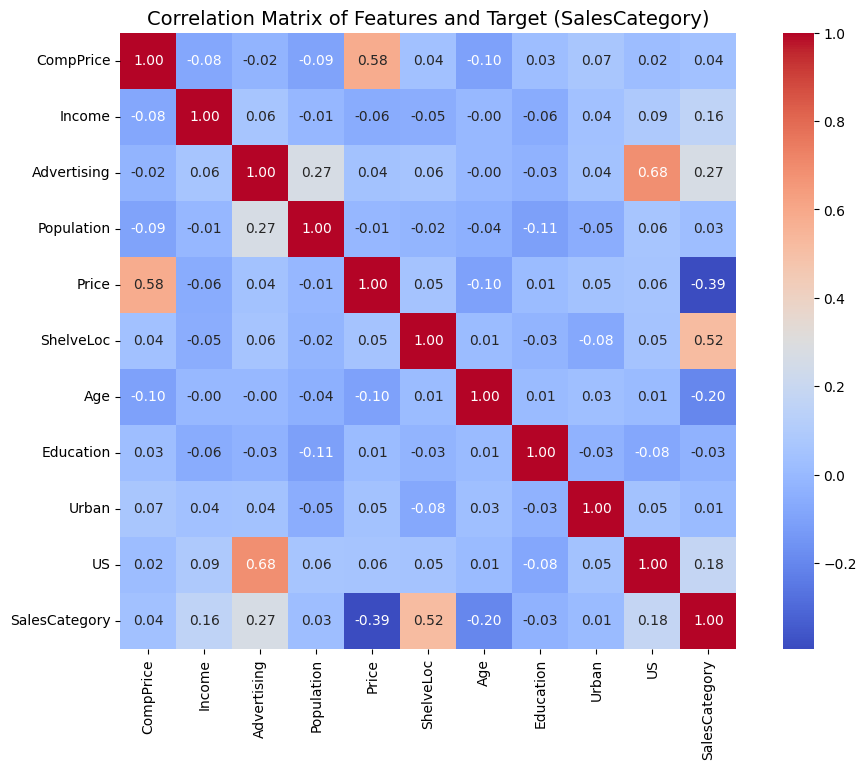

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy to avoid modifying df_labeled
df_corr = df_final.copy()

# Encode SalesCategory: low=0, medium=1, high=2
category_mapping = {'low': 0, 'medium': 1, 'high': 2}
df_corr['SalesCategory'] = df_corr['SalesCategory'].map(category_mapping)

# Compute correlation matrix
corr_matrix = df_corr.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Features and Target (SalesCategory)", fontsize=14)
plt.show()


**📊 Correlation Results**

We analyzed the correlation between each feature and the `SalesCategory` label.

---

**🔼 Most Positively Correlated:**
- 🟢 **ShelveLoc** (**r = +0.52**)  
  → Better shelf location (Good > Medium > Bad) has the **strongest positive effect** on sales.
  
- 🟢 **Advertising** (**r = +0.27**)  
  → More advertising is **moderately associated** with better sales performance.
  
- 🟢 **US** (**r = +0.18**)  
  → Products sold in the US tend to belong to higher sales categories.

---

**🔽 Most Negatively Correlated:**
- 🔴 **Price** (**r = -0.39**)  
  → Higher price is **strongly associated** with lower sales.

- 🔴 **Age** (**r = -0.20**)  
  → Older customers are slightly more likely to buy lower-sales-category products.

---

💡 These features are the important ones that affect the Sales


## 3.3 Entropy Calculation

Entropy is a metric that quantifies the uncertainty or impurity in a set of class labels.

We implemented a function `calculate_entropy(y)` that:
1. Counts the frequency of each class label in `y`
2. Converts those counts into probabilities
3. Applies the entropy formula:
   \[
   $Entropy(S) = -\sum p_i \log_2(p_i)$
   \]

- Entropy is **0** when all samples belong to the same class.
- Entropy is **maximum** when the classes are equally distributed.

This function is useful for evaluating data splits in decision tree learning.


In [ ]:
import numpy as np

def calculate_entropy(y):
    """
    Calculate the entropy of a label array y.

    Parameters:
        y (array-like): An array of class labels (e.g. ['low', 'medium', 'high'])

    Returns:
        float: The entropy value
    """
    # Convert to NumPy array if not already
    y = np.array(y)

    # Count the frequency of each class label
    _, counts = np.unique(y, return_counts=True)

    # Convert counts to probabilities
    probabilities = counts / counts.sum()

    # Compute entropy using the formula
    entropy = -np.sum(probabilities * np.log2(probabilities))

    return entropy


In [ ]:
# Example: a balanced sample

y_example = [1, 2 ,3,1, 3, 2,4,4]
entropy_value = calculate_entropy(y_example)
print(f"Entropy: {entropy_value:.4f}")


Entropy: 2.0000


## 3.4 Information Gain

We implemented the `info_gain(parent, children)` function based on the entropy formula:


$IG(S, A) = Entropy(S) - \sum \text{weight}_v \cdot Entropy(S_v)$


### Parameters:
- `parent`: Full dataset class labels
- `children`: A list of subgroups from splitting the dataset by a feature

The function:
1. Calculates entropy of the full dataset.
2. Computes the weighted entropy of each child subset.
3. Subtracts the total from the parent entropy to get **Information Gain**.

This is used in decision trees to find the most informative feature for splitting.


In [ ]:
def info_gain(parent, children):

    total_len = len(parent)
    parent_entropy = calculate_entropy(parent)

    weighted_entropy = 0
    for child in children:
        weight = len(child) / total_len
        entropy_child = calculate_entropy(child)
        weighted_entropy += weight * entropy_child

    return parent_entropy - weighted_entropy


In [ ]:
# Example labels (parent dataset)
parent_labels = ['low', 'medium', 'low', 'high', 'medium', 'high', 'low']

# Split by a feature (example children groups)
children_labels = [
    ['low', 'low','low'],       # group A
    ['medium', 'medium'],        # group B
    ['high', 'high']            # group C

]

# Compute information gain
ig = info_gain(parent_labels, children_labels)
print(f"Information Gain: {ig:.4f}")


Information Gain: 1.5567


## 3.5 Decision Tree

### 🌳 Pruning in Decision Trees

**Pruning** helps reduce overfitting by cutting back branches that do not contribute significantly to classification accuracy.

**Advantages:**
- Improves generalization on unseen data
- Reduces model complexity

**Disadvantages:**
- Risk of underfitting if over-pruned
- Requires validation or tuning


### 🔍 Hyperparameter Tuning with GridSearchCV

We used `GridSearchCV` to find the optimal decision tree parameters. It tested combinations of:
- `max_depth`
- `min_samples_split`
- `criterion` (gini vs. entropy)

It selects the model with the best cross-validation accuracy.


In [ ]:
# Separate features and target
X = df_final.drop(columns=['SalesCategory'])
y = df_final['SalesCategory']


In [ ]:
from sklearn.model_selection import train_test_split

# Split into 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check the shape of splits
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (280, 10)
Test shape: (120, 10)
Train shape: (280, 10)
Test shape: (120, 10)


## Train-Test Split

Before training a decision tree, we split the data:

- **Features**: All columns except `SalesCategory`
- **Target**: `SalesCategory` column

We used `train_test_split` with 70% training and 30% testing, and applied stratification to maintain class balance in both sets.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the model and parameter grid
tree = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [1,6,10],
    'min_samples_split': [2,5,7],
    'min_samples_leaf': [1, 5, 8],
    'criterion': ['gini', 'entropy']
}


# Grid search
grid = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.65


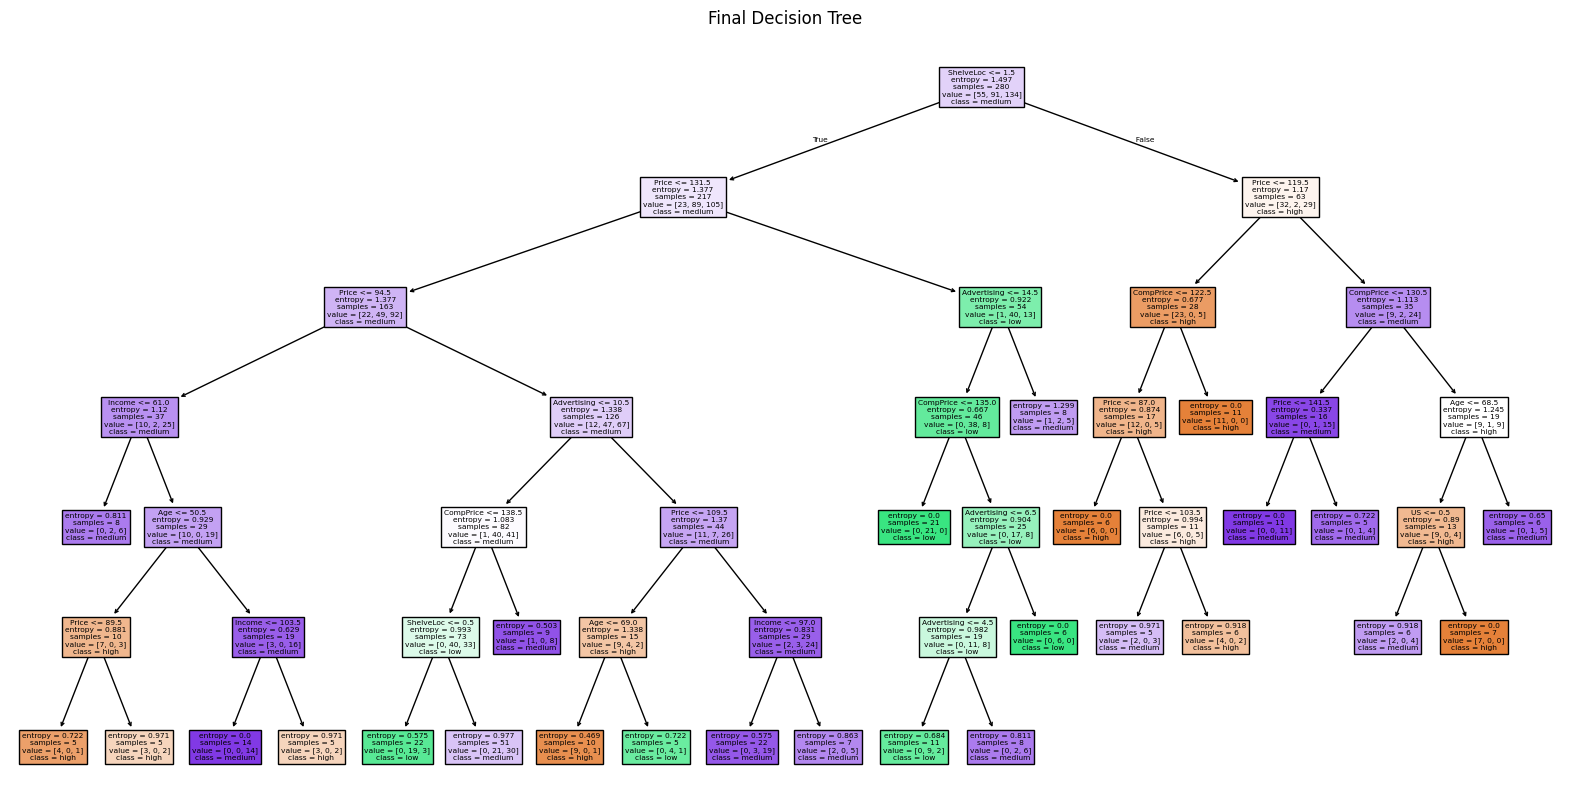

📊 Test Accuracy with Best Tree: 0.5750


In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

best_tree = grid.best_estimator_

plt.figure(figsize=(20, 10))
plot_tree(best_tree, filled=True, feature_names=X_train.columns, class_names=best_tree.classes_)
plt.title("Final Decision Tree")
plt.show()
# Evaluate it on the test set
test_accuracy = best_tree.score(X_test, y_test)
print(f"📊 Test Accuracy with Best Tree: {test_accuracy:.4f}")

### ⚖️ Overfitting vs. Underfitting

- **Overfitting**: Tree is too deep or complex. Fits training data very well but performs poorly on test data.
- **Underfitting**: Tree is too shallow or simple. Cannot capture the complexity of the data.

**Controls:**
- Use `max_depth`, `min_samples_split`, `min_samples_leaf` to manage model complexity.
- Use pruning and cross-validation to balance generalization.


In [ ]:
from sklearn.metrics import classification_report

y_pred = best_tree.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        high       0.45      0.57      0.50        23
         low       0.71      0.56      0.63        39
      medium       0.57      0.59      0.58        58

    accuracy                           0.57       120
   macro avg       0.57      0.57      0.57       120
weighted avg       0.59      0.57      0.58       120



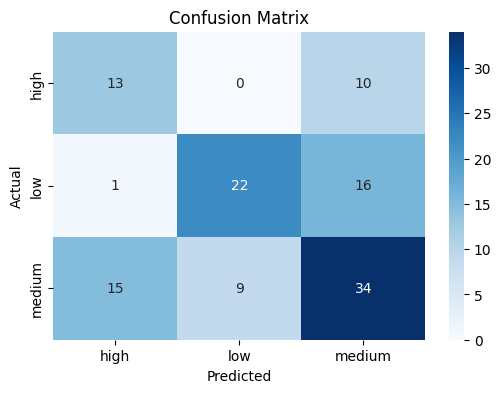

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, labels=best_tree.classes_)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_tree.classes_, yticklabels=best_tree.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()